In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

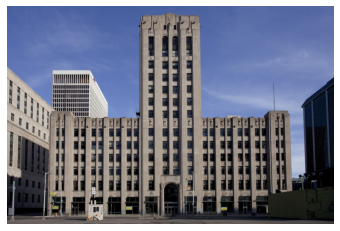

In [2]:
img = mpimg.imread('building2.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

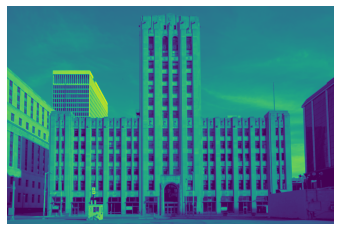

In [3]:
# to gray 
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]
plt.imshow(gray)
plt.axis('off')
plt.show()

In [4]:
# Demension reduction with singular value decomposition (SVD)
from numpy import linalg

U, S, V = linalg.svd(gray)

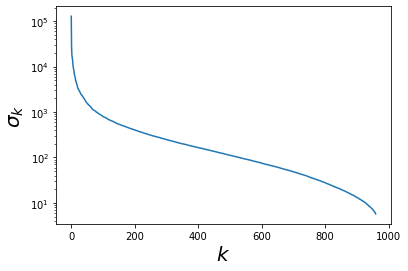

In [19]:
plt.semilogy(S) 
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\sigma_k$', fontsize = 20)
# We change the fontsize of minor ticks label (làm cho số ở trục to ra)
# plt.tick_params(axis='both', labelsize=18)
# plt.tight_layout()
plt.show()

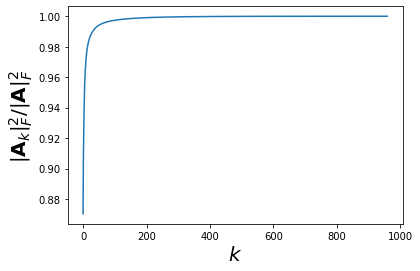

In [21]:
# percentage of preserving energy

a = np.sum(S**2)
b = np.zeros_like(S)
for i in range(S.shape[0]):
    b[i] = np.sum(S[:i+1]**2, axis = 0)/a

plt.plot(b)
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\|\mathbf{A}_k\|_F^2 / \|\mathbf{A}\|_F^2$', fontsize = 20)
plt.show()

In [30]:
## error
e =  1 - b
e[100]

0.002640897693341082

In [23]:
def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

# A = gray
# U, S, V = LA.svd(A)
A1 = []
K = [5, 50, 100]
for k in K:
    A1.append(approx_rank_k(U, S, V,k))

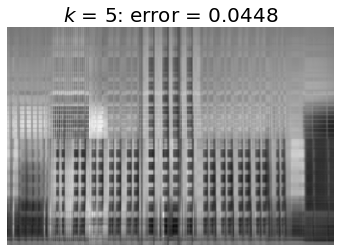

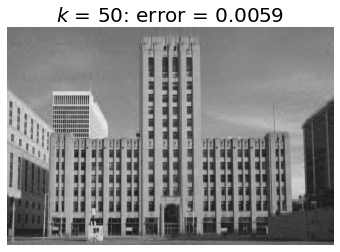

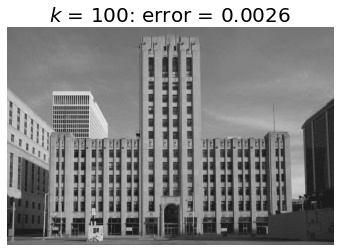

In [27]:
for i in range(3):
    plt.imshow(A1[i], cmap = 'gray')
    plt.axis('off')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    plt.title(label, fontsize = 20)
    plt.show()